### Define the State using DataClass

In [2]:
from dataclasses import dataclass
from typing import Literal

@dataclass
class DataClass:
    name:str
    game:Literal["cricket",'badmiton']
    

### Define the Node

In [3]:
def play_game(state:DataClass):
    print("The Play Node has been Called...")
    return {"name":state.name}

def cricket(state:DataClass):
    print("The Cricket Node has been Called...")
    return {"name":state.name , "game":"cricket"}

def badmiton(state:DataClass):
    print("The Badmiton Node has been Called...")
    return {"name":state.name, "game":"badmiton"}


### Define the Logic

In [4]:
from typing import Literal
import random

def decide_play(state:DataClass)->Literal["cricket","badmiton"]:
    
    if random.random()>0.5:
        return "cricket"
    else:
        return "badmiton"
    

### Graph Construction

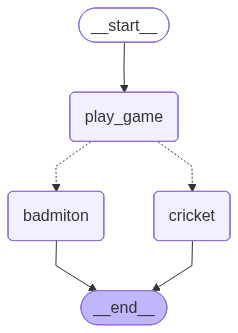

In [5]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

#Graph Construnction

#Define the Graph

graph = StateGraph(DataClass)

#Add Nodes

graph.add_node("play_game",play_game)
graph.add_node("cricket",cricket)
graph.add_node("badmiton",badmiton)

##Flow of Graph(Edges)
graph.add_edge(START,"play_game")
graph.add_conditional_edges("play_game",decide_play)
graph.add_edge("cricket",END)
graph.add_edge("badmiton",END)

#Compile the Graph
graph_builder = graph.compile()

#View

display(Image(graph_builder.get_graph().draw_mermaid_png()))

### Graph Invocation

In [6]:

graph_builder.invoke(DataClass(name="Husen",game=""))

The Play Node has been Called...
The Badmiton Node has been Called...


{'name': 'Husen', 'game': 'badmiton'}